# Statement

## Training
1. Load the titanic dataset (https://www.kaggle.com/c/titanic/data) [train.csv]
2. Divide the data into X (all columns but survived) and y (survived only). Save y for the training  
3. Remove missing values by mean of column in numerical columns  
    a) Remove missing values by mode of column in categorical columns
4. Perform some exploration with data plotting.
5. Do one hot encoding on categorical data (pd.get_dummies)
6. Perform a normalization with sklearn transformers.
7. Train a classifier of your choice

## Testing
1. Perform the exact same preprocessing steps as before with the [test.csv]
2. Score the classifier generated before. This will get you the accuracy.


Train at least three classifiers and see which is the one that is performing the best.

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

### Load the data

In [2]:
df = pd.read_csv('data/titanic_train.csv').set_index('PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Divide into X and y

In [3]:
data_filt = df.drop(['Survived'], axis=1)
X = data_filt
y = df["Survived"]

X.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Replace missing values

In [4]:
X.isnull().sum()

Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [5]:
#Reemplazar age con el promedio de edad
#Reemplazar cabina con 0 y embarked tambien
mean_age = X.loc[:,"Age"].mean()
#print (mean_age)
X['Age'] = X['Age'].replace(np.nan, mean_age)
#print (mean_age)
#Reemplazar cabina con 0 y embarked tambien

In [6]:
X['Cabin'] = X['Cabin'].replace(np.nan, 0)
X['Embarked'] = X['Embarked'].replace(np.nan, 0)

In [7]:
X.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

### Data plotting and exploration

1. PassengerId type should be integers
1. Survived Survived or Not
1. Pclass Class of Travel
1. Name Name of Passenger
1. Sex Gender
1. Age Age of Passengers
1. SibSp Number of Sibling/Spouse aboard
1. Parch Number of Parent/Child aboard
1. Ticket
1. Fare
1. Cabin
1. Embarked The port in which a passenger has embarked. C - Cherbourg, S - Southampton, Q = Queenstown

Decide which columns you want to keep. Does **Name** matter for our model? What is our **target value**?

In [8]:
# TODO: Fill columns_to_keep with the one's you want
columns_to_keep = ['Pclass','Age','SibSp','Parch','Fare','Sex','Embarked']
X = X[columns_to_keep]

In [9]:
numericals = X.select_dtypes(np.number)
numericals.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

## You can use the function below to condunct an exploratory analysis of your data. Just remember to not change the numericals value

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 20]
plt.rcParams['font.size'] = 22
from itertools import combinations
from math import ceil

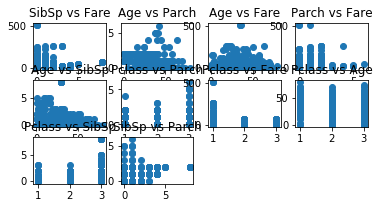

In [11]:
fig = plt.figure()

pairs = set(combinations(numericals.columns, 2))
n_rows = ceil(np.sqrt(len(pairs)))
for i, pair in enumerate(pairs):
    ax = fig.add_subplot(n_rows, n_rows, i + 1)
    ax.set_title(' vs '.join([str(e) for e in pair]))
    plt.scatter(numericals[pair[0]], numericals[pair[1]])

### One hot encoding
For now just apply it directly to X, we'll describre it with more detail in a following class. 

In [12]:
X = pd.get_dummies(X)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_0,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,3,22.0,1,0,7.2500,0,1,0,0,0,1
2,1,38.0,1,0,71.2833,1,0,0,1,0,0
3,3,26.0,0,0,7.9250,1,0,0,0,0,1
4,1,35.0,1,0,53.1000,1,0,0,0,0,1
5,3,35.0,0,0,8.0500,0,1,0,0,0,1


In [13]:
X.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_0', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

### Scale the data
Do you need to make any imports?

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled



array([[ 0.82737724, -0.5924806 ,  0.43279337, ..., -0.48204268,
        -0.30756234,  0.61930636],
       [-1.56610693,  0.63878901,  0.43279337, ...,  2.0745051 ,
        -0.30756234, -1.61470971],
       [ 0.82737724, -0.2846632 , -0.4745452 , ..., -0.48204268,
        -0.30756234,  0.61930636],
       ...,
       [ 0.82737724,  0.        ,  0.43279337, ..., -0.48204268,
        -0.30756234,  0.61930636],
       [-1.56610693, -0.2846632 , -0.4745452 , ...,  2.0745051 ,
        -0.30756234, -1.61470971],
       [ 0.82737724,  0.17706291, -0.4745452 , ..., -0.48204268,
         3.25137334, -1.61470971]])

In [20]:
X = pd.DataFrame(X_scaled)
X.head()


,0,1,2,3,4,5,6,7,8,9,10
0,0.827377,-0.592481,0.432793,-0.473674,-0.502445,-0.737695,0.737695,-0.047431,-0.482043,-0.307562,0.619306
1,-1.566107,0.638789,0.432793,-0.473674,0.786845,1.355574,-1.355574,-0.047431,2.074505,-0.307562,-1.614710
2,0.827377,-0.284663,-0.474545,-0.473674,-0.488854,1.355574,-1.355574,-0.047431,-0.482043,-0.307562,0.619306
3,-1.566107,0.407926,0.432793,-0.473674,0.420730,1.355574,-1.355574,-0.047431,-0.482043,-0.307562,0.619306
4,0.827377,0.407926,-0.474545,-0.473674,-0.486337,-0.737695,0.737695,-0.047431,-0.482043,-0.307562,0.619306


### Split between training and testing

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8, random_state=1)

In [18]:
print(f'X_train: {X_train.shape}. y_train: {y_train.shape}')
print(f'Labels: {y_train}')
assert X_train.shape == (712,11)
# only if we hot encode
# assert y_train.shape == (120,3)

X_train: (712, 11). y_train: (712,)
Labels: PassengerId
302    1
310    1
517    1
121    0
571    1
731    1
229    0
564    0
312    1
614    0
195    1
186    0
340    0
275    1
876    1
853    0
62     1
278    0
428    1
677    0
494    0
434    0
572    1
774    0
136    0
249    1
346    1
766    1
135    0
508    1
      ..
87     0
479    0
504    0
754    0
216    1
581    1
563    0
399    0
669    0
491    0
253    0
469    0
358    0
255    0
277    0
179    0
282    0
391    1
509    0
750    0
584    0
130    0
145    0
848    0
646    1
716    0
768    0
73     0
236    0
38     0
Name: Survived, Length: 712, dtype: int64


In [21]:
print('Number of observations in the training data:', len(X_train))
print('Number of observations in the test data:',len(X_test))

Number of observations in the training data: 712
Number of observations in the test data: 179


## Pick three different classifiers and train the model

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
clf = RandomForestClassifier(n_estimators = 10000).fit(X_train, y_train)
clf.score(X_test, y_test)

0.776536312849162

## Which one performs the best? Predict the outcome with the test set!

## Advanced: We can actually Fit with all classifiers and check the best performance
Not required to do anything except figure out what values (X, y) you need to have in place for this to work...

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

[Text(0, 0, 'KNeighborsClassifier'),
 Text(0, 0, 'RandomForestClassifier'),
 Text(0, 0, 'MLPClassifier'),
 Text(0, 0, 'SVC'),
 Text(0, 0, 'GaussianProcessClassifier'),
 Text(0, 0, 'DecisionTreeClassifier'),
 Text(0, 0, 'AdaBoostClassifier'),
 Text(0, 0, 'GaussianNB'),
 Text(0, 0, 'QuadraticDiscriminantAnalysis')]

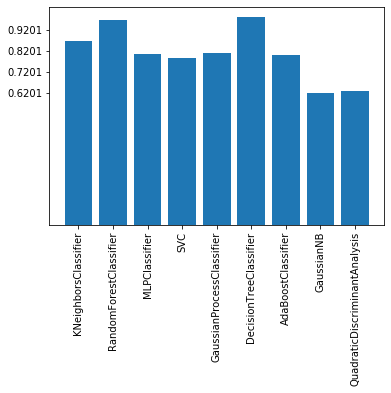

In [26]:
models = [
    KNeighborsClassifier, RandomForestClassifier, MLPClassifier, SVC, GaussianProcessClassifier,
    DecisionTreeClassifier, AdaBoostClassifier, GaussianNB, QuadraticDiscriminantAnalysis
]

accuracies = []
for model in models:
    clf = model().fit(X, y)
    accuracies.append(clf.score(X_test, y_test))

fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
plt.bar([m.__name__ for m in models], accuracies)

ax.set_yticks(np.arange(min(accuracies), 1, 0.1))
ax.set_xticklabels([m.__name__ for m in models], rotation='vertical')